<a href="https://colab.research.google.com/github/2303A510I3/ADM_LAB_2303A510I3/blob/main/ADM_LAB_10_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Coefficients: [[-0.87819396 -0.02810736 -0.29153014 -0.10173783  0.00325096  0.
  -0.31410898 -2.60282998]]
 Matrix:
[[89 16]
 [20 54]]


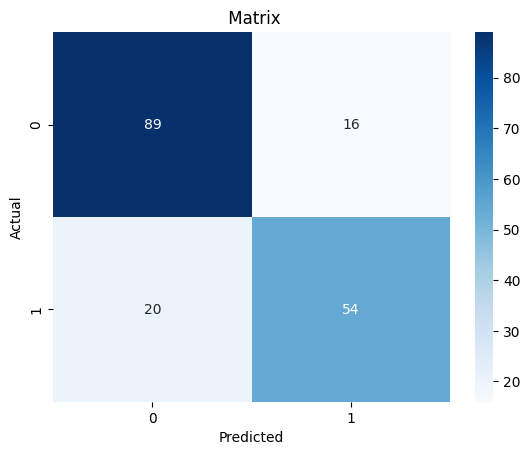

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

titanic_data = pd.read_csv('titanic.csv')

X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex']]
y = titanic_data['Survived']

X = pd.get_dummies(X, columns=['Embarked', 'Sex'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print("Coefficients:", model.coef_)

cm = confusion_matrix(y_test, y_pred)
print(" Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' Matrix')
plt.show()